In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 


from stable_baselines import PPO2
from codes.environment.multichannel import SimpleCavityEnv
from stable_baselines.common.vec_env import SubprocVecEnv
import numpy as np
import qutip as qt
import matplotlib
import matplotlib.pyplot as plt
from codes.functions.check_policy import load_info
import os
import json
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)
import os
from mpl_toolkits.axes_grid1.inset_locator import mark_inset, inset_axes, InsetPosition, BboxPatch, BboxConnector
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from tensorflow.python.util import deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
plt.rcParams.update({'font.size': 10})
plt.rcParams.update({'figure.dpi': 150})
import seaborn as sns
def make_env(args, i):
    def _init():
        env = SimpleCavityEnv(args, counter=i,testing=True)
        return env
    return _init

import matplotlib
matplotlib.use('module://ipykernel.pylab.backend_inline')



#rhos = np.load("data/rhos_superpos.npy")
#probabilities = np.load("data/probabilities_superpos.npy")
#actions = np.load("data/actions_superpos.npy")
#fidelities = np.load("data/fidelities_superpos.npy")





/u/pori/.local/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/u/pori/.local/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/u/pori/.local/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/u/pori/.local/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



/u/pori/conda-envs/conda_env/lib/python3.7/site-packages/stable_baselines/__init__.py:33: UserWarning: stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation.
  "stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation."


In [3]:
folder="/ptmp/pori/simulations/2021-03-03_super_pos_1_3_v5"

num_subfolders=len([x for x in sorted(os.listdir(folder))[2:] if ""in x  ])
models=np.zeros((4, 4), dtype=object)
args=np.zeros((4, 4), dtype=object)
summaries=np.zeros((4, 4), dtype=object)

for state1 in range(4):
    for state2 in range(4):
        direc=folder+"/training_{0}_{1}".format(state1, state2)
        args[state1, state2] = load_info(direc, print=False)
        args[state1, state2]["t_mean"]=10
        last_model="rl_model_"+ str(sorted([int(x.split("_")[2]) for x in os.listdir(direc+"/model")])[-3])+"_steps"
        models[state1, state2]=PPO2.load(direc+"/model/"+last_model)
        summaries[state1, state2]=np.load(folder+"/summaries/summary_training_{0}_{1}".format(state1, state2)+".npy",allow_pickle=True).item()
        models[state1, state2].save("data/appo_superpos/model_{0}_{1}".format(state1, state2))
#np.save("data/summaries_focks.npy", summaries)        
    

Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loading a model without an environment, this model cannot be trained unti

In [ ]:
rewards=[]
min_len=len(summaries[0, 0]["probs_final"])
for state1 in range(4):
    for state2 in range(4):
        if len(summaries[state1, state2]["probs_final"])<min_len:
            min_len=len(summaries[state1, state2]["probs_final"])
        
N=1
xlist=np.linspace(0, summaries[state1, state2]["ep"] * summaries[state1, state2]["ntraj"], min_len-N+1)


for state1 in range(4):
    for state2 in range(4):
        mov_av=np.convolve(summaries[state1, state2]["probs_final"][:min_len], np.ones(N)/N, mode='valid')
        rewards.append(mov_av)
        plt.plot(xlist,rewards[-1], linestyle="dashed", alpha=0.3)
#mean=np.array(rewards).mean(axis=0)

plt.xlabel("Episodes")
plt.ylabel("Final fidelity")
plt.show()

In [ ]:
ntraj=100

args[0, 0] = load_info(direc, print=False)
args[0, 0]["t_mean"]=10
args[0, 0]["T_max"]=args[0, 0]["T_max"]*5
args[0, 0]["timesteps"]=args[0, 0]["timesteps"]*5
args[0, 0]["multiplier"]=args[0, 0]["multiplier"]*5

env = SubprocVecEnv([make_env(args[0, 0], i) for i in range(ntraj)], start_method="fork")
timesteps=env.get_attr("T")[0]
Nstates=env.get_attr("Nstates")[0]
substeps=env.get_attr("numberPhysicsMicroSteps")[0]
num_actions=env.get_attr("num_actions")[0]


rhos=np.zeros((4, 4,ntraj, timesteps, Nstates, Nstates),dtype="complex")
probabilities=np.zeros((4, 4,ntraj,Nstates,timesteps*substeps))
actions=np.zeros((4, 4, ntraj,num_actions,timesteps))
fidelities=np.zeros((4, 4, ntraj,timesteps))
meas=np.zeros((4, 4, ntraj,timesteps))


states_ = [
    [1,0],
    [0,2],
    [0,3],
    [1,2],
    [1,3],
    [3,2]
]

for state_ in states_:
    state1, state2 = state_[0], state_[1]
    direc=folder+"/training_{0}_{1}".format(state1, state2)
    args[state1, state2] = load_info(direc, print=False)
    args[state1, state2]["t_mean"]=10
    args[state1, state2]["T_max"]=args[state1, state2]["T_max"]*5
    args[state1, state2]["timesteps"]=args[state1, state2]["timesteps"]*5
    args[state1, state2]["multiplier"]=args[state1, state2]["multiplier"]*5



    env = SubprocVecEnv([make_env(args[state1, state2], i) for i in range(ntraj)], start_method="fork")




    timesteps=env.get_attr("T")[0]
    Nstates=env.get_attr("Nstates")[0]
    substeps=env.get_attr("numberPhysicsMicroSteps")[0]
    num_actions=env.get_attr("num_actions")[0]





    print(state1, state2)
    obs=env.reset()
    for i in range(args[state1, state2]["timesteps"]):
        action=models[state1, state2].predict(obs, deterministic=True)
        rhos[state1, state2, :, i]=env.get_attr("Rho")
        obs, r, done, _ =env.step(action[0])


    probabilities[state1, state2]=np.array(env.get_attr("probabilities"))
    actions[state1, state2]=np.array(env.get_attr("actions_plot"))
    fidelities[state1, state2]=np.array(env.get_attr("fidelities"))
    env.close()

    
np.save("data/rhos_superpos.npy", rhos)
np.save("data/probabilities_superpos.npy", probabilities)
np.save("data/actions_superpos.npy", actions)
np.save("data/fidelities_superpos.npy", fidelities)


1 0
0 2


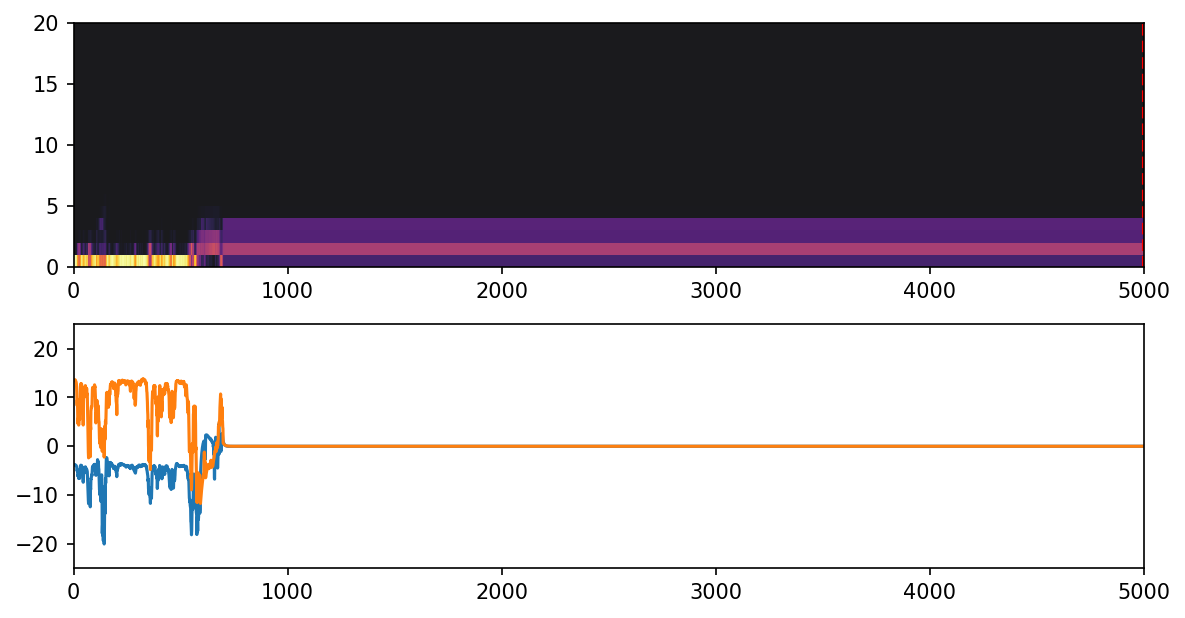

In [102]:
fig=plt.figure(figsize=(8,6))
target1 = 3
target2 = 1
num_traj=1
timesteps_partial=5000
Nstates_partial=20

gs = fig.add_gridspec(3, 1)
ax = fig.add_subplot(gs[0, :])
#ax.imshow( np.transpose(np.abs(np.diagonal(rhos,axis1=1, axis2=2))[:timesteps,:Nstates]),
ax.imshow( probabilities[target1, target2, num_traj, :Nstates_partial,:timesteps_partial*substeps],
                                       origin='lower',
                                       aspect='auto', 
                                       vmin=0,
                                       vmax=1,
                                       cmap="inferno",
                                       alpha=0.9, interpolation="none",
                                       extent=(0, timesteps, 0, Nstates_partial)
                                    )
ax.set_xlim(0,timesteps_partial)
ax.set_ylim(0,Nstates_partial)
ax.vlines(timesteps-2,0,Nstates, color="red", linestyle="dashed")
#ax.text(timesteps,Nstates+1,"Mean fidelity: \n{}".format(round(np.mean(np.array(fidelities)[:,:,timesteps_partial-1]),4)),ha="center", color="red")


ax=fig.add_subplot(gs[1, :])
ax.set_xlim(0,timesteps_partial)
ax.set_ylim(-25,25)
ax.plot(actions[target1, target2, num_traj, 0,:timesteps_partial], label="Real")
ax.plot(actions[target1, target2, num_traj, 1,:timesteps_partial], label="Img")

# ax=fig.add_subplot(gs[2, :])
# for index, action in enumerate(range(2,6)):
#     ax.set_xlim(0,timesteps_partial)
#     ax.set_ylim(0,1)
#     ax.plot(actions[0, action,:timesteps_partial], label="Meas {}".format(index))
# ax.legend()
plt.tight_layout()

In [115]:
fidelities.mean(axis=2)[:,:,-1]

array([[0.99969007, 0.39432029, 0.86278164, 0.59915245],
       [0.90177879, 0.99950253, 0.9381549 , 0.83668535],
       [0.66451006, 0.85434112, 0.92632747, 0.71584456],
       [0.49983578, 0.59441671, 0.84121468, 0.9798245 ]])

In [9]:

ntraj = 50
state1 = 1
state2 = 3


direc=folder+"/training_{0}_{1}".format(state1, state2)
args[state1, state2] = load_info(direc, print=False)
args[state1, state2]["t_mean"]=10
args[state1, state2]["T_max"]=args[state1, state2]["T_max"]*5
args[state1, state2]["timesteps"]=args[state1, state2]["timesteps"]*5
args[state1, state2]["multiplier"]=args[state1, state2]["multiplier"]*5



env = SubprocVecEnv([make_env(args[state1, state2], i) for i in range(ntraj)], start_method="fork")
timesteps=env.get_attr("T")[0]
Nstates=env.get_attr("Nstates")[0]
substeps=env.get_attr("numberPhysicsMicroSteps")[0]
num_actions=env.get_attr("num_actions")[0]
rhos=np.zeros((ntraj, args[state1, state2]["timesteps"], Nstates, Nstates),dtype="complex")



obs=env.reset()
for i in range(args[state1, state2]["timesteps"]):
    if i%1000==0: print(i)
    action=models[state1, state2].predict(obs, deterministic=True)
    obs, r, done, _ =env.step(action[0])
    rhos[:, i]=env.get_attr("Rho")

probs_temp = np.array(env.get_attr("probabilities"))
actions_temp = np.array(env.get_attr("actions_plot"))
fidelities_temp = np.array(env.get_attr("fidelities"))
probs_final_temp = np.array(env.get_attr("probs_final"))
observations_temp = np.array(env.get_attr("observations"))


np.save("data/rhos_superpos_1_3.npy", rhos)
np.save("data/probs_superpos_1_3.npy", probs_temp)
np.save("data/fidelities_superpos_1_3.npy", fidelities_temp)
np.save("data/actions_superpos_1_3.npy", actions_temp)
np.save("data/observations_superpos_1_3.npy", observations_temp)

0
1000
2000
3000
4000


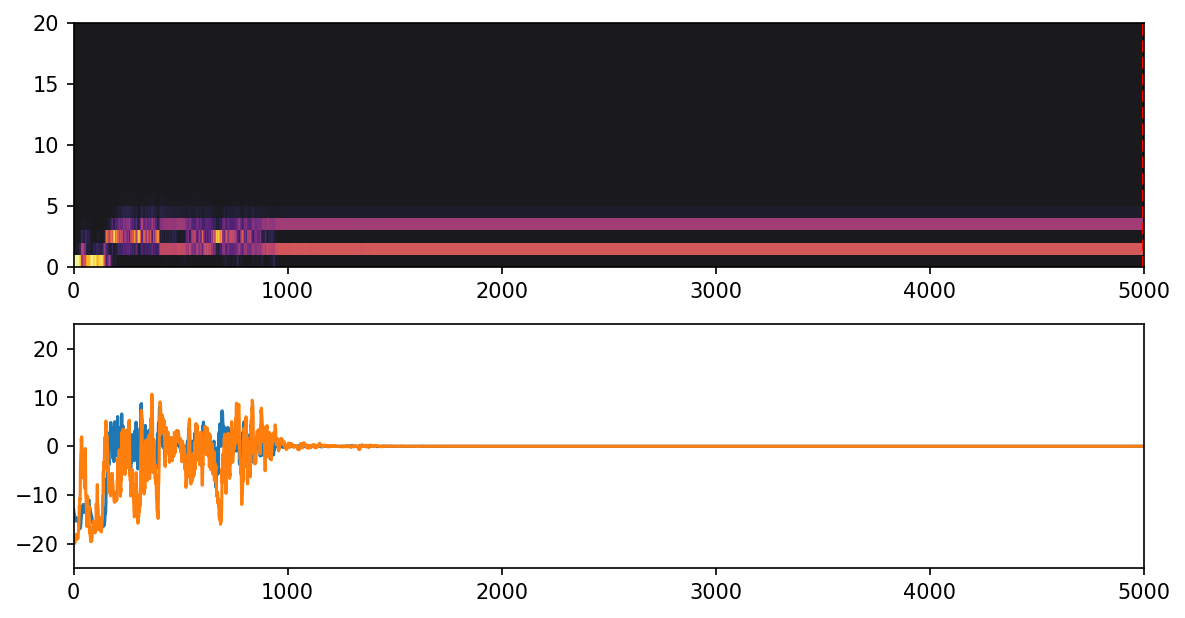

In [8]:
fig=plt.figure(figsize=(8,6))
num_traj=4
timesteps_partial=timesteps
Nstates_partial=20

gs = fig.add_gridspec(3, 1)
ax = fig.add_subplot(gs[0, :])
#ax.imshow( np.transpose(np.abs(np.diagonal(rhos,axis1=1, axis2=2))[:timesteps,:Nstates]),
ax.imshow( probs_temp[num_traj, :Nstates_partial,:timesteps_partial*substeps],
                                       origin='lower',
                                       aspect='auto', 
                                       vmin=0,
                                       vmax=1,
                                       cmap="inferno",
                                       alpha=0.9, interpolation="none",
                                       extent=(0, timesteps, 0, Nstates_partial)
                                    )
ax.set_xlim(0, timesteps_partial)
ax.set_ylim(0, Nstates_partial)
ax.vlines(timesteps-2,0,Nstates, color="red", linestyle="dashed")
#ax.text(timesteps,Nstates+1,"Mean fidelity: \n{}".format(round(np.mean(np.array(fidelities)[:,:,timesteps_partial-1]),4)),ha="center", color="red")


ax=fig.add_subplot(gs[1, :])
ax.set_xlim(0,timesteps_partial)
ax.set_ylim(-25,25)
ax.plot(actions_temp[num_traj, 0,:timesteps_partial], label="Real")
ax.plot(actions_temp[num_traj, 1,:timesteps_partial], label="Img")

# ax=fig.add_subplot(gs[2, :])
# for index, action in enumerate(range(2,6)):
#     ax.set_xlim(0,timesteps_partial)
#     ax.set_ylim(0,1)
#     ax.plot(actions[0, action,:timesteps_partial], label="Meas {}".format(index))
# ax.legend()
plt.tight_layout()

/u/pori/.conda/envs/conda_env/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/u/pori/.conda/envs/conda_env/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


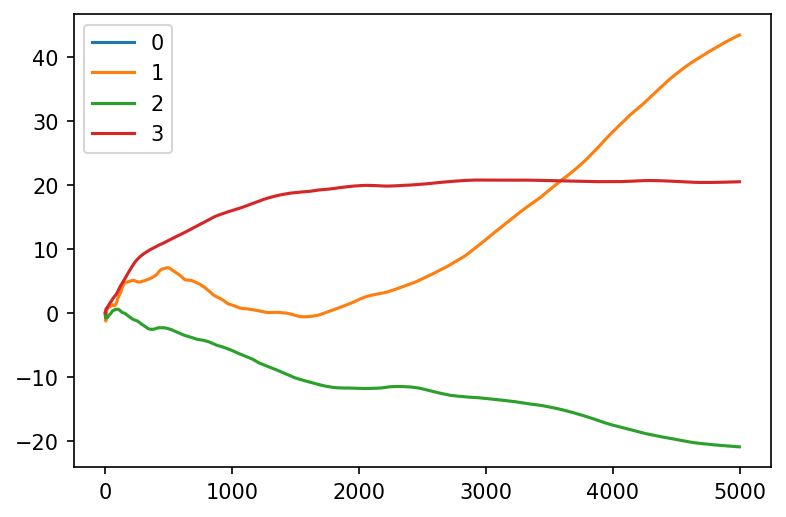

In [113]:

for i in range(4):
    signal=np.array(env.get_attr("integrals"))[num_traj, :, 0, i]
    plt.plot(signal.cumsum()/env.get_attr("kappa_meas")[0]/i, label = i)
    
plt.legend()

In [11]:
P = np.zeros((4, 20, 20))
P[np.arange(4), np.arange(4), np.arange(4)] =1



In [18]:
ntraj = 1
state1 = 1
state2 = 3


direc=folder+"/training_{0}_{1}".format(state1, state2)
args[state1, state2] = load_info(direc, print=False)
args[state1, state2]["t_mean"]=10
args[state1, state2]["T_max"]=args[state1, state2]["T_max"]*5
args[state1, state2]["timesteps"]=args[state1, state2]["timesteps"]*5
args[state1, state2]["multiplier"]=args[state1, state2]["multiplier"]*5



env = SubprocVecEnv([make_env(args[state1, state2], i) for i in range(ntraj)], start_method="fork")
timesteps=env.get_attr("T")[0]
Nstates=env.get_attr("Nstates")[0]
substeps=env.get_attr("numberPhysicsMicroSteps")[0]
num_actions=env.get_attr("num_actions")[0]
rhos=np.zeros((ntraj, args[state1, state2]["timesteps"], Nstates, Nstates),dtype="complex")
signals=np.zeros((args[state1, state2]["timesteps"], 4),dtype="complex")


obs=env.reset()
for i in range(args[state1, state2]["timesteps"]):
    if i%1000==0: print(i)
    action=models[state1, state2].predict(obs, deterministic=True)
    obs, r, done, _ =env.step(action[0])
    rhos[:, i]=env.get_attr("Rho")
    
    dW = np.random.randn(env.get_attr("N")[0]) * np.sqrt(env.get_attr("dt")[0])
    temp = np.matmul(P, env.get_attr("Rho")[0]) - np.matmul(env.get_attr("Rho")[0], P)
    quadrature = np.real(np.trace(temp, axis1=1, axis2=2))
    
    signals[i, :] = np.sqrt(env.get_attr("kappa_meas")[0] / 2) * quadrature + dW / env.get_attr("dt")[0]

0
1000
2000
3000
4000


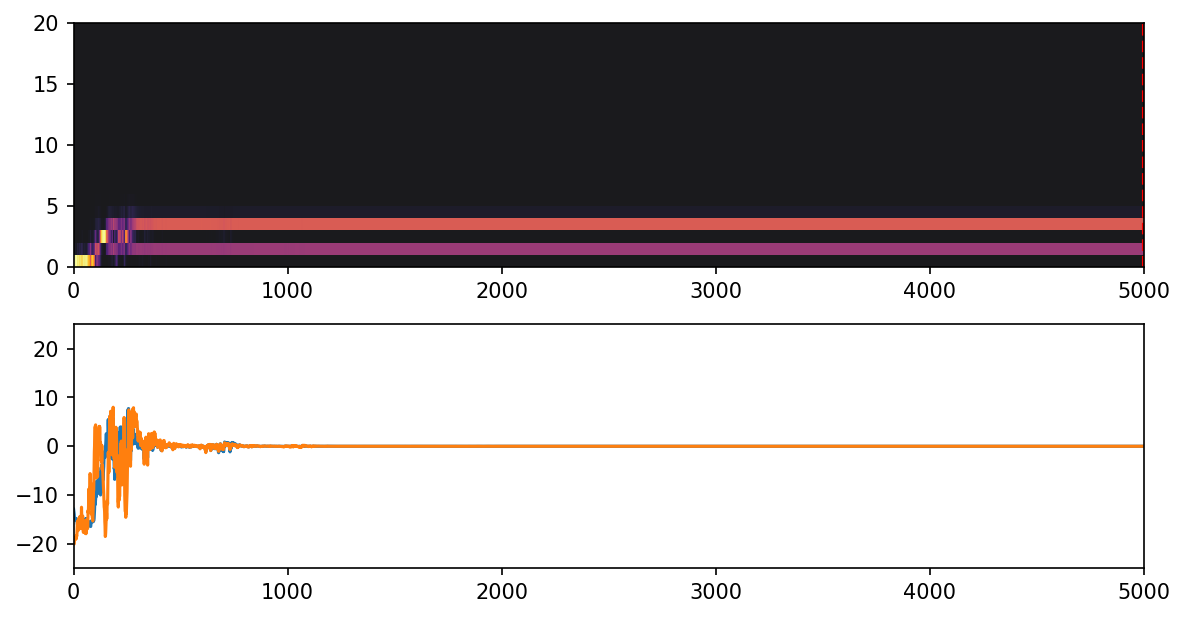

In [22]:
fig=plt.figure(figsize=(8,6))
num_traj=4
timesteps_partial=timesteps
Nstates_partial=20

gs = fig.add_gridspec(3, 1)
ax = fig.add_subplot(gs[0, :])
#ax.imshow( np.transpose(np.abs(np.diagonal(rhos,axis1=1, axis2=2))[:timesteps,:Nstates]),
ax.imshow( probs_temp[num_traj, :Nstates_partial,:timesteps_partial*substeps],
                                       origin='lower',
                                       aspect='auto', 
                                       vmin=0,
                                       vmax=1,
                                       cmap="inferno",
                                       alpha=0.9, interpolation="none",
                                       extent=(0, timesteps, 0, Nstates_partial)
                                    )
ax.set_xlim(0, timesteps_partial)
ax.set_ylim(0, Nstates_partial)
ax.vlines(timesteps-2,0,Nstates, color="red", linestyle="dashed")
#ax.text(timesteps,Nstates+1,"Mean fidelity: \n{}".format(round(np.mean(np.array(fidelities)[:,:,timesteps_partial-1]),4)),ha="center", color="red")


ax=fig.add_subplot(gs[1, :])
ax.set_xlim(0,timesteps_partial)
ax.set_ylim(-25,25)
ax.plot(actions_temp[num_traj, 0,:timesteps_partial], label="Real")
ax.plot(actions_temp[num_traj, 1,:timesteps_partial], label="Img")

# ax=fig.add_subplot(gs[2, :])
# for index, action in enumerate(range(2,6)):
#     ax.set_xlim(0,timesteps_partial)
#     ax.set_ylim(0,1)
#     ax.plot(actions[0, action,:timesteps_partial], label="Meas {}".format(index))
# ax.legend()
plt.tight_layout()

In [21]:
integrals = np.zeros((observations_1_3.shape[-1], observations_1_3.shape[1]))

tao = 5000


for i in range(integrals.shape[0]):
    for timestep in range(1, integrals.shape[1]):
        integrals[i, timestep] = integrals[i, timestep - 1]*(timestep)/(timestep+1)+observations_1_3[num_traj, timestep, 0, i]/timestep
        #integrals[i, timestep] = np.mean(observations_1_3[num_traj, :timestep, 0, i])
        #integrals[i, timestep] = 1/tao * (observations_1_3[num_traj, timestep, 0, i] - integrals[i, timestep-1])


for i in range(integrals.shape[0]):
    signal=integrals[i]
    plt.plot(signal, label = i)
    
plt.legend()


(-0.9166628903112067+0j)
(-0.4780196728683005+0j)
(0.4422087069064306+0j)
(-0.18559107612956524+0j)


In [23]:
rhos.shape

(1, 5000, 20, 20)